In [7]:
def mean_squared_error(pred, true):
    total_squared_error = sum((pred - true)**2)
    return total_squared_error / len(pred)

In [8]:
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

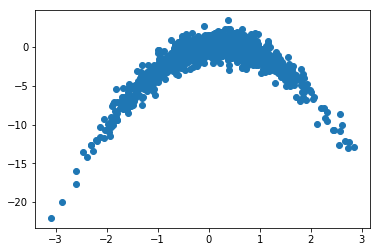

Error with degree-1 polynomial: [[ 2712.71581957]]
Error with degree-2 polynomial: [[ 182050.20655988]]
Error with degree-3 polynomial: [[ 12144160.59967541]]
Error with degree-4 polynomial: [[  9.55137253e+08]]


Error with degree-1 polynomial: [[ 16214660.07227357]]
Error with degree-2 polynomial: [[  8.66576373e+10]]
Error with degree-3 polynomial: [[  1.61773224e+15]]
Error with degree-4 polynomial: [[  6.85023463e+19]]
                   0
count       4.000000
mean  -173131.266541
std    401401.341095
min   -771550.150990
25%   -201267.882454
50%     -4787.015529
75%     23349.600383
max     88599.115883


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

''' Part a '''
y = np.random.normal(size=1000)
x = np.random.normal(size=1000)
y = x - 2*x**2 + np.random.normal(size=1000)

''' Part b '''
plt.scatter(x, y)
plt.show()

''' Part c '''
np.random.seed(42)
xy_frame = pd.DataFrame(np.asmatrix((x, y)).reshape(1000, 2), columns=['X', 'Y'])

loo = LeaveOneOut()
for k in range(1, 5):    
    X = pd.DataFrame(xy_frame['X'])
    for j in range(2, k + 1):
        X['X^' + str(j)] = xy_frame['X']**j

    error = 0
    for train_index, test_index in loo.split(xy_frame['X']):  
        error = 0
        train_data = xy_frame.drop(test_index).drop('Y', axis=1)
        train_labels = xy_frame.drop(test_index).drop('X', axis=1)
        test_data = xy_frame.iloc[test_index].drop('Y', axis=1)
        test_labels = xy_frame.iloc[test_index].drop('X', axis=1) 
    
        beta = np.asmatrix(X.drop(test_index)).transpose() * np.matrix(train_labels)
        y_estimate = beta.reshape(1, k) * np.asmatrix(X.iloc[test_index]).reshape(k, 1)
        error = error + (y_estimate - test_labels)**2
        
    print 'Error with degree-' + str(k) + ' polynomial: ' + str(error / 1000)
print "\n"
    
''' Part d '''
np.random.seed(30)

loo = LeaveOneOut()
for k in range(1, 5):    
    X = pd.DataFrame(xy_frame['X'])
    for j in range(2, k + 1):
        X['X^' + str(j)] = xy_frame['X']**j

    error = 0
    for train_index, test_index in loo.split(xy_frame['X']):    
        train_data = xy_frame.drop(test_index).drop('Y', axis=1)
        train_labels = xy_frame.drop(test_index).drop('X', axis=1)
        test_data = xy_frame.iloc[test_index].drop('Y', axis=1)
        test_labels = xy_frame.iloc[test_index].drop('X', axis=1) 
    
        beta = np.asmatrix(X.drop(test_index)).transpose() * np.matrix(train_labels)
        y_estimate = beta.reshape(1, k) * np.asmatrix(X.iloc[test_index]).reshape(k, 1)
        error = error + (y_estimate - test_labels)**2
        
    print 'Error with degree-' + str(k) + ' polynomial: ' + str(error / 1000)
    
''' Part f '''
print pd.DataFrame(beta).describe()